In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


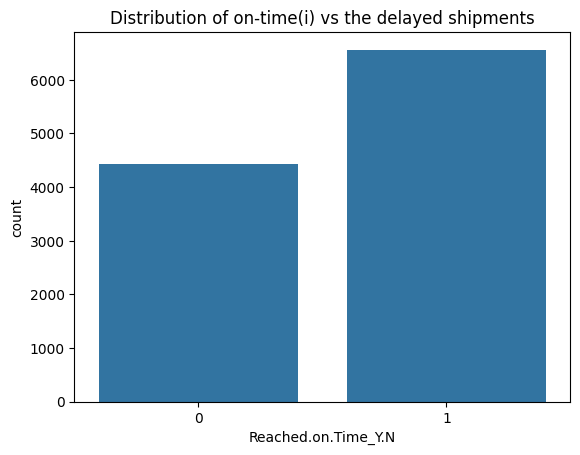

In [ ]:
sns.countplot(x='Reached.on.Time_Y.N',data=df)
plt.title("Distribution of on-time(i) vs the delayed shipments")
plt.show()

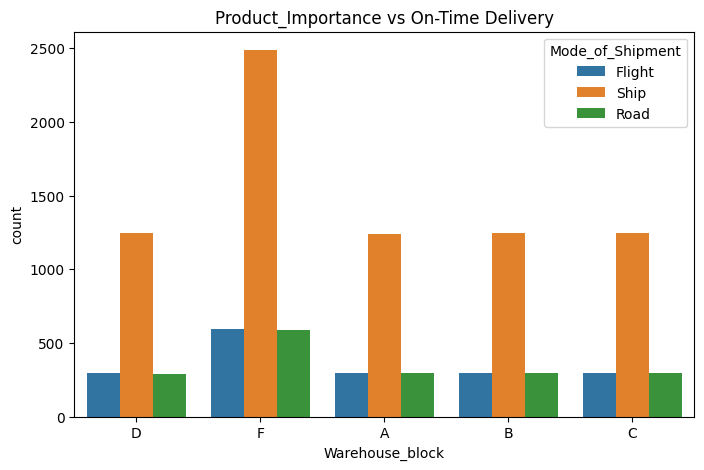

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Warehouse_block', hue='Mode_of_Shipment',data=df)
plt.title("Product_Importance vs On-Time Delivery")
plt.show()

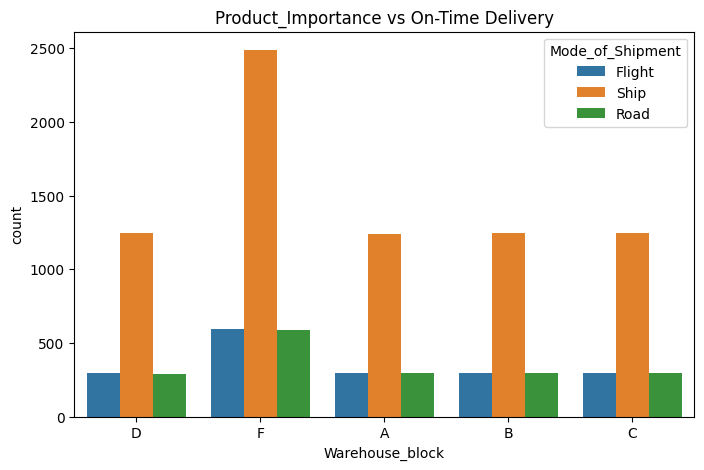

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Warehouse_block', hue='Mode_of_Shipment',data=df)
plt.title("Product_Importance vs On-Time Delivery")
plt.show()

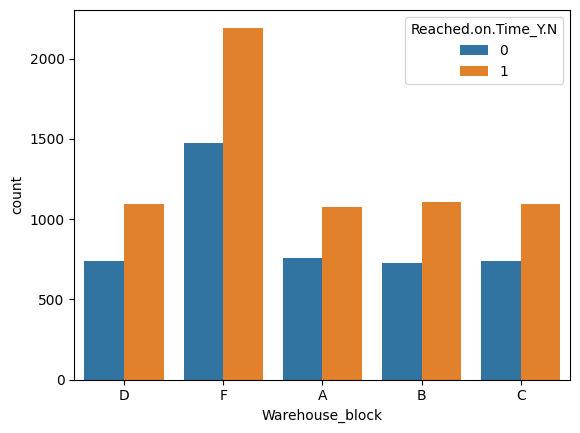

In [ ]:
sns.countplot(x="Warehouse_block", hue="Reached.on.Time_Y.N", data=df)
plt.show()


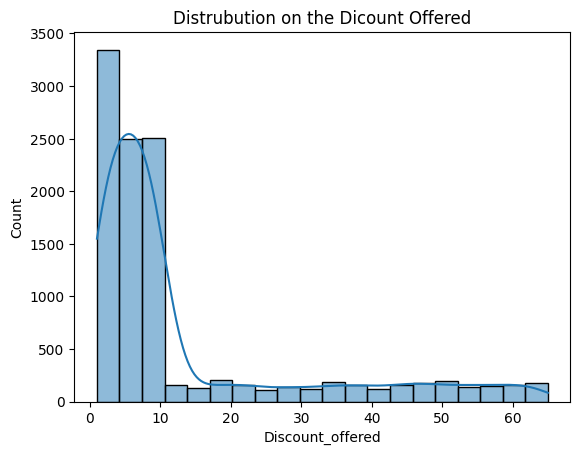

In [ ]:

# //Histogram on the Discount Offered//
plt.figure(figure=(8,4))
sns.histplot(df['Discount_offered'], bins =20, kde=True)
plt.title("Distrubution on the Dicount Offered")
plt.show()

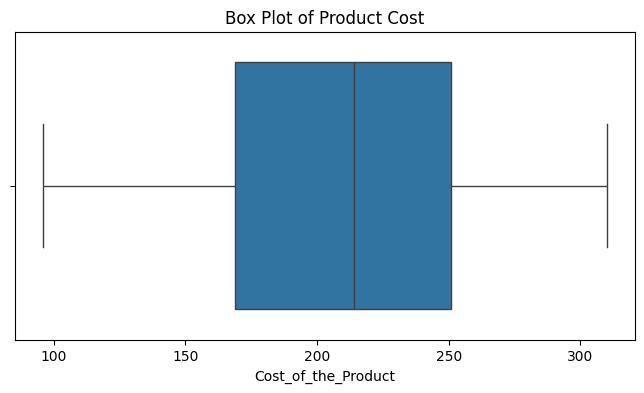

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Cost_of_the_Product'])
plt.title("Box Plot of Product Cost")
plt.show()

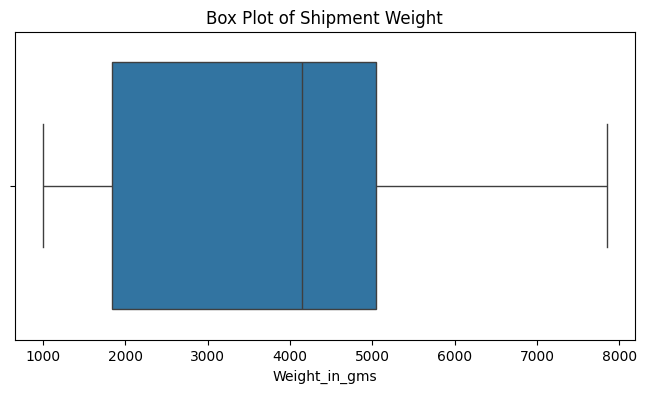

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Weight_in_gms'])
plt.title("Box Plot of Shipment Weight")
plt.show()

In [ ]:

print(f"Skewness:\n",df.select_dtypes(include=np.number).skew())

Skewness:
 ID                     0.000000
Customer_care_calls    0.391926
Customer_rating        0.004360
Cost_of_the_Product   -0.157117
Prior_purchases        1.681897
Discount_offered       1.798929
Weight_in_gms         -0.249747
Reached.on.Time_Y.N   -0.394257
dtype: float64


In [ ]:
df['Cost_of_the_Product'].value_counts()


Cost_of_the_Product
245    110
257    109
260    106
254    101
264    100
      ... 
107      5
99       5
120      5
96       5
122      4
Name: count, Length: 215, dtype: int64

In [ ]:

df['Weight_in_gms'].value_counts()


Weight_in_gms
4883    12
1145    10
5783    10
4741    10
5672    10
        ..
1425     1
3811     1
1609     1
2178     1
1098     1
Name: count, Length: 4034, dtype: int64

In [ ]:

df['Weight_in_gms'].iloc[0:20]


0     1233
1     3088
2     3374
3     1177
4     2484
5     1417
6     2371
7     2804
8     1861
9     1187
10    2888
11    3253
12    3667
13    2602
14    1009
15    2707
16    1194
17    3952
18    2495
19    1059
Name: Weight_in_gms, dtype: int64

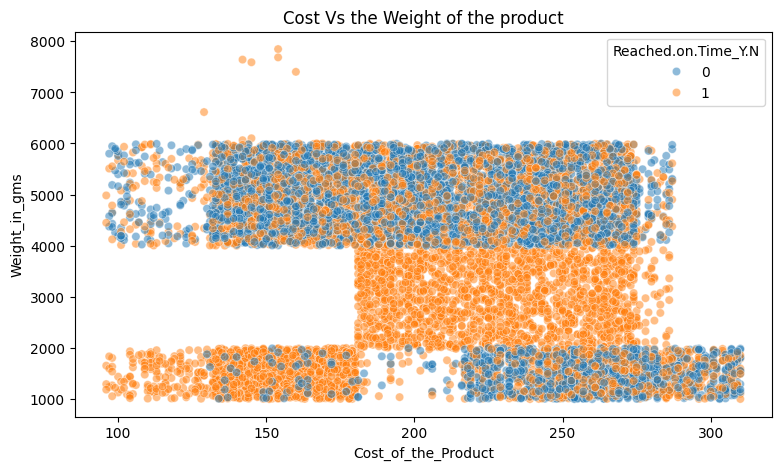

In [ ]:

#Scatter Plot
plt.figure(figsize=(9,5))
sns.scatterplot(x='Cost_of_the_Product',y='Weight_in_gms', hue='Reached.on.Time_Y.N',data=df,alpha = 0.5)
plt.title("Cost Vs the Weight of the product")
plt.show()

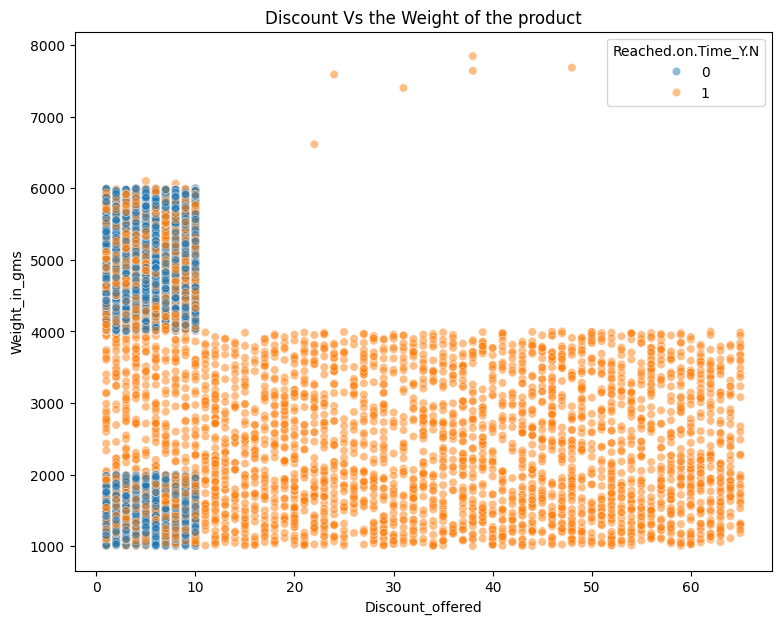

In [ ]:
#Scatter Plot
plt.figure(figsize=(9,7))
sns.scatterplot(x='Discount_offered',y='Weight_in_gms', hue='Reached.on.Time_Y.N',data=df,alpha = 0.5)
plt.title("Discount Vs the Weight of the product")
plt.show()

In [ ]:

df['Warehouse_block'].unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [ ]:

df['Customer_rating'].unique()

array([2, 5, 3, 1, 4], dtype=int64)

In [ ]:
print("Pivot Table: Average Customer Rating")
pivot1 = df.pivot_table(values = 'Customer_rating',index = "Warehouse_block",columns="Mode_of_Shipment",aggfunc='mean')
display(pivot1)

Pivot Table: Average Customer Rating


Mode_of_Shipment,Flight,Road,Ship
Warehouse_block,,,
A,3.070707,2.812925,2.964573
B,2.996622,3.000000,2.971842
C,2.932203,3.068027,2.991158
D,2.818182,3.219178,3.018474
F,3.038851,2.936860,3.000804


In [ ]:
print("Pivot Table: Average Discount Offered")
pivot1 = df.pivot_table(values = 'Discount_offered',index = "Warehouse_block",columns="Mode_of_Shipment",aggfunc='mean')
display(pivot1)

Pivot Table: Average Discount Offered


Mode_of_Shipment,Flight,Road,Ship
Warehouse_block,,,
A,13.050505,13.163265,13.277778
B,12.584459,13.037415,13.366050
C,12.725424,13.748299,13.477492
D,13.208754,12.496575,13.206426
F,13.697635,13.027304,13.811897


In [ ]:
avg_cost = df['Cost_of_the_Product'].mean()
avg_cost

210.19683607600692

In [ ]:
high_cost = df[df['Cost_of_the_Product']>avg_cost]
high_cost
print(f"Number of high Cost Shipments (>{avg_cost:.2f}):{len(high_cost)}")

Number of high Cost Shipments (>210.20):5714


In [ ]:
high_imp_discount = df[df['Product_importance'] == 'high']['Discount_offered'].mean()
print(f"Average Discount for high importance products {high_imp_discount} ")

Average Discount for high importance products 14.666666666666666 


In [ ]:
avg_weight = df['Weight_in_gms'].mean()
print(f"Average weight(in gms) of products :{avg_weight}")


Average weight(in gms) of products :3634.016728793527


In [ ]:
max_weight = df['Weight_in_gms'].max()
print(f"Maximum weight(in gms) of all products :{max_weight}")

Maximum weight(in gms) of all products :7846


In [ ]:
min_weight = df['Weight_in_gms'].min()
print(f"Minimum weight(in gms) of all products :{min_weight}")

Minimum weight(in gms) of all products :1001


In [ ]:
high_weight = df[df['Weight_in_gms']>avg_weight]
high_weight
print(f"Number of high weightt Shipments (>{avg_weight:.2f}):{len(high_weight)}")

Number of high weightt Shipments (>3634.02):6300
